In [1]:
import numpy as np
import pandas as pd
import scipy
# import statsmodels.api as sm
import matplotlib as plt 
import seaborn as sns
sns.set()
# import matplotlib.pyplot as plt
import bt
import ffn
import datetime as dt

# import pd

import datetime
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [ ]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='AVC65FM7A32OFUBP',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('SPY')

In [ ]:
import numpy as np
date = np.array('2003-12-31', dtype=np.datetime64)

In [ ]:
date

In [ ]:
date = date + np.arange(365 * 16)
date

In [ ]:
date = pd.DataFrame(date)
# date = date.asfreq('BM')
# date

In [ ]:
# date = pd.to_datetime(date['0'])
date.columns = ['Date']
date.index =date['Date']
date = date.asfreq('BM')
date = date.to_csv('date_range.csv')

In [423]:


data  = pd.read_csv('date_range.csv',)
# data = data.fillna('100')
# data.loc[:1][0:2] = 100
# data.columns = [['Date','SP_LONG_FLAT_PROGRAM', 'Multi_Strategy_Futures_Program', 
#                 'Global_Contrarian_Stock_Index_Program', 'Contrarian_S&P_500_Stock_Index']]

# data.index = pd.to_datetime(data.Date) 
data = data.ffill()
data  =pd.DataFrame(data, )
# data = 
# data.plot(figsize=(15,14))
data.tail()

,Date,SP LONG & FLAT PROGRAM,Multi-Strategy Futures Program,Global Contrarian Stock Index Program,Contrarian S&P 500 Stock Index
188,7/31/2019,236.22,72.95,295.45,364.12
189,8/30/2019,236.22,72.95,295.45,364.12
190,9/30/2019,236.22,72.95,295.45,364.12
191,10/31/2019,236.22,72.95,295.45,364.12
192,11/29/2019,236.22,72.95,295.45,364.12


In [424]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
data.pop('Date',)

data.to_csv('clean_PAM_data.csv')
PAM = data['2004':'2018']
PAM.tail()

,SP LONG & FLAT PROGRAM,Multi-Strategy Futures Program,Global Contrarian Stock Index Program,Contrarian S&P 500 Stock Index
Date,,,,
2018-08-31,273.20,78.69,346.53,423.74
2018-09-28,273.97,77.05,351.93,364.12
2018-10-31,236.22,72.95,295.45,364.12
2018-11-30,236.22,72.95,295.45,364.12
2018-12-31,236.22,72.95,295.45,364.12


In [425]:
data.columns
# sma = data.rolling(10).mean()

# bt.merge(sma,data).dropna().plot()

Index([' SP LONG & FLAT PROGRAM ', ' Multi-Strategy Futures Program ',
       ' Global Contrarian Stock Index Program ',
       ' Contrarian S&P 500 Stock Index '],
      dtype='object')

In [426]:
# prog_1_t = bt.Backtest(prog_1_BH, prog_1)

# prog_1_BH_data
import quandl

vix = quandl.get("CHRIS/CBOE_VX2", authtoken="3bQZxu98ay2a-UGyRTdx")
es = quandl.get("CHRIS/CME_ES1", authtoken="3bQZxu98ay2a-UGyRTdx")
ty = quandl.get("CHRIS/CME_TY1", authtoken="3bQZxu98ay2a-UGyRTdx")

vix.head()

vix =vix.Settle
# ['2008':]
# vix = ffn.rebase(vix)
vix = vix.to_frame()
vix = ffn.rebase(vix)
vix.columns = ['VIX']



es = es.Settle

es = es.to_frame()
es = es.rebase(es)
es.columns = ['ES']

In [427]:
ty = ty.Settle

ty = ty.to_frame()
ty = ty.rebase(ty)
ty.columns = ['ty']

In [494]:
# data[' SP LONG & FLAT PROGRAM ']
# data[' Multi-Strategy Futures Program ']
# data[' Global Contrarian Stock Index Program ']
# data[' Contrarian S&P 500 Stock Index ']

prog_1  = PAM[' Contrarian S&P 500 Stock Index ']
sma = PAM[' Contrarian S&P 500 Stock Index '].rolling(10).median()


prog_1 = prog_1.to_frame()
sma = sma.to_frame()
tw = tw = sma.copy()



In [542]:


# set appropriate target weights
tw[prog_1 > sma] = 0.5
tw[prog_1 <= sma] = 1.5
tw[sma.isnull()] = 0.0

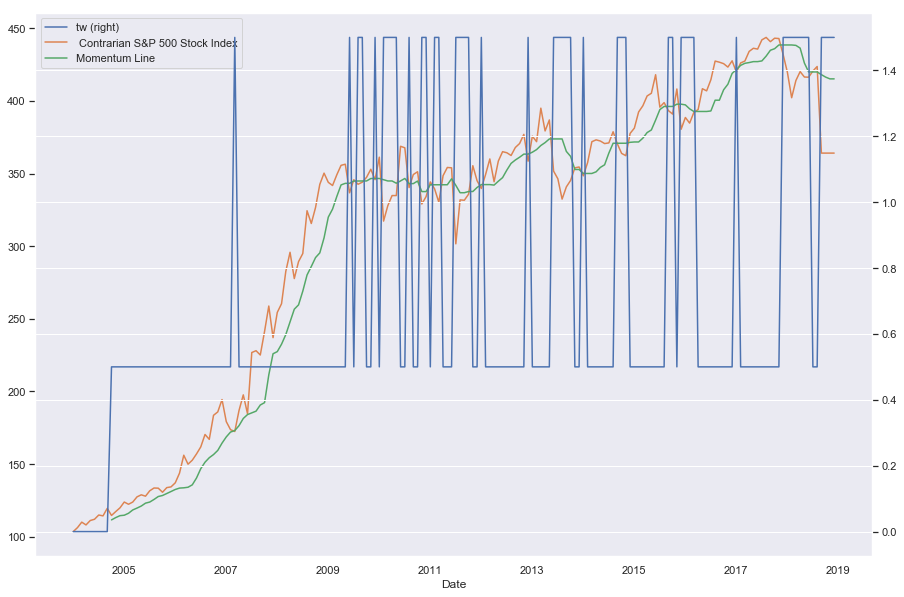

In [543]:
# plot the target weights + chart of price & SMAs
tmp = bt.merge(tw, prog_1, sma)
tmp.columns = ['tw',' Contrarian S&P 500 Stock Index' , 'Momentum Line']
ax = tmp.plot(figsize=(15,10), secondary_y=['tw'])

Contrarian S&P 500 Stock Index_Hc_Index
0% [############################# ] 100% | ETA: 00:00:00

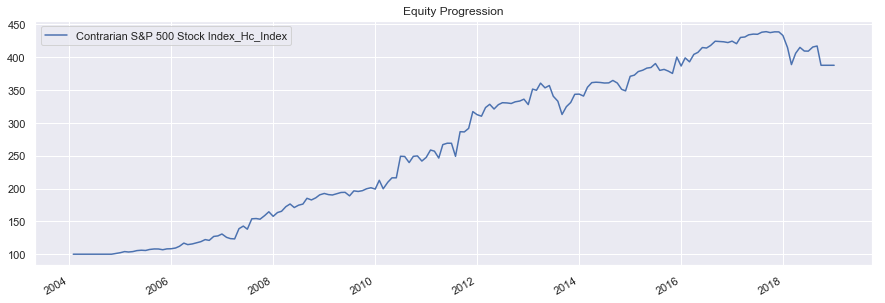

In [544]:
prog_1_Hc_Index = bt.Strategy('Contrarian S&P 500 Stock Index_Hc_Index', 
                              [bt.algos.WeighTarget(tw),
                                    bt.algos.Rebalance()])

prog_1_Hc_Index_t = bt.Backtest(prog_1_Hc_Index, prog_1)
prog_1_Hc_Index_res = bt.run(prog_1_Hc_Index_t)


prog_1_Hc_Index_res.plot()


In [545]:
data  = PAM[' Contrarian S&P 500 Stock Index ']
data = data.to_frame()

tw = tw = sma.copy()

# set appropriate target weights
tw[prog_1 > sma] = 1.0
tw[prog_1 <= sma] = 1.0
tw[sma.isnull()] = 0.0



prog_1_BH_strat = bt.Strategy('Contrarian S&P 500 Stock Index', 
                              [bt.algos.WeighTarget(tw),
                                    bt.algos.Rebalance()])

prog_1_t = bt.Backtest(prog_1_BH_strat, data)
prog_1_res = bt.run(prog_1_t)



Contrarian S&P 500 Stock Index
0% [############################# ] 100% | ETA: 00:00:00

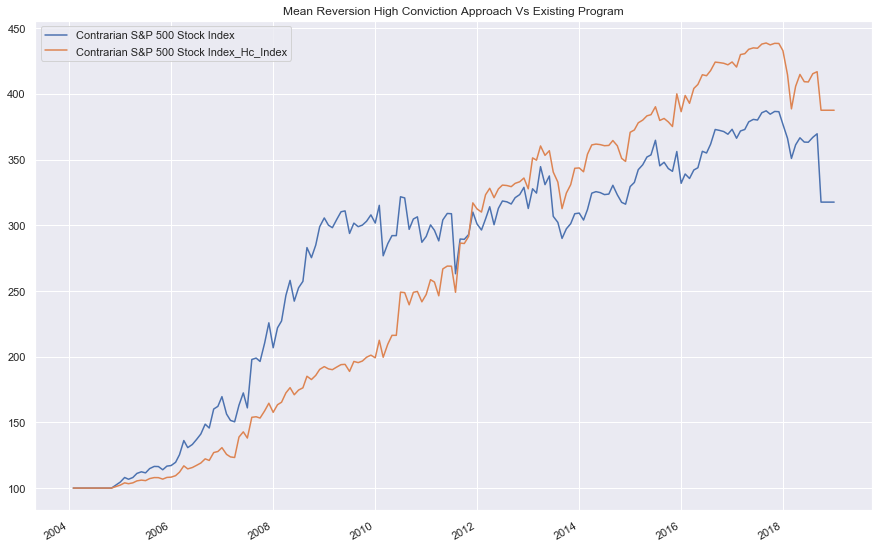

In [546]:
results = bt.merge(prog_1_res.prices, 
                   prog_1_Hc_Index_res.prices).plot(
                   figsize=(15,10),title = 'Mean Reversion High Conviction Approach Vs Existing Program')

In [547]:
res2 = bt.run(prog_1_Hc_Index_t, prog_1_t)
res2.display()

Stat                 Contrarian S&P 500 Stock Index_Hc_Index    Contrarian S&P 500 Stock Index
-------------------  -----------------------------------------  --------------------------------
Start                2004-01-29                                 2004-01-29
End                  2018-12-31                                 2018-12-31
Risk-free rate       0.00%                                      0.00%

Total Return         287.60%                                    217.66%
Daily Sharpe         3.99                                       2.77
Daily Sortino        9.04                                       4.75
CAGR                 9.50%                                      8.05%
Max Drawdown         -13.24%                                    -18.21%
Calmar Ratio         0.72                                       0.44

MTD                  0.00%                                      0.00%
3m                   0.00%                                      0.00%
6m                   -5.2

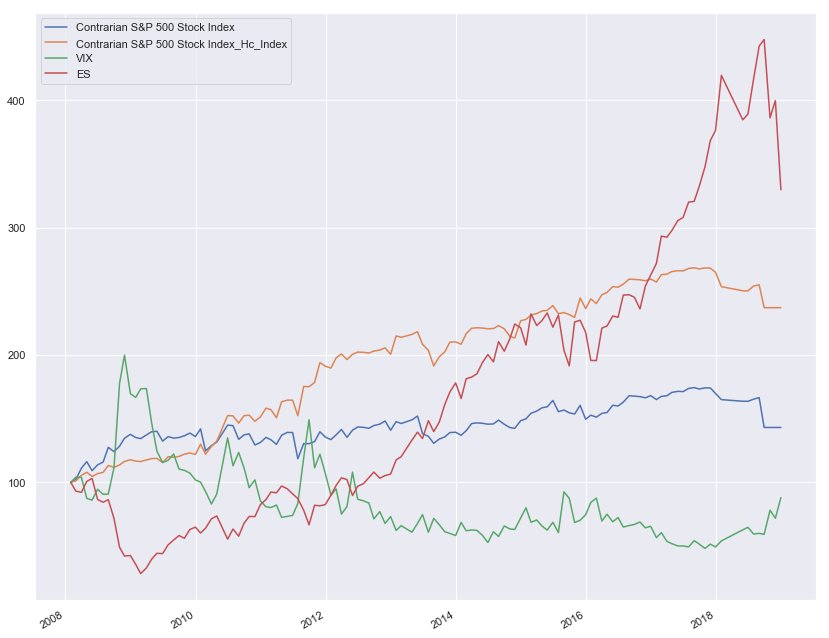

In [548]:
z = bt.merge(prog_1_res.prices, prog_1_Hc_Index_res.prices,
                vix.asfreq('BM'), es.asfreq('BM')).dropna()

z['2008':].rebase().plot(figsize=(14,12))

In [558]:
data = bt.merge(prog_1_res.prices, prog_1_Hc_Index_res.prices,
                vix.asfreq('BM'), es.asfreq('BM'))

# data = bt.merge(prog_1_res.prices,
#                 vix.asfreq('BM'), es.asfreq('BM'))

# data = bt.merge(prog_1_Hc_Index_res.prices,
#                 vix.asfreq('BM'), es.asfreq('BM'), ty.asfreq('BM'))

# data = bt.merge(prog_1_Hc_Index_res.prices,prog_1_Hc_Index_res.prices,prog_1_Hc_Index_res.prices,
#                 vix.asfreq('BM'), es.asfreq('BM'))

# data = bt.merge(prog_1_Hc_Index_res.prices,
#                 vix.asfreq('BM'), es.asfreq('BM'))

# data = bt.merge(prog_1_res.prices,
#                 vix.asfreq('BM'))


data = data.ffill()
data = data.dropna()
# data.columns = [['prog_1_Hc_Index', 'prog_1_Hc_Index_2', 'prog_1_Hc_Index_3', 'VIX', 'ES']]

In [559]:
# create the strategy
s = bt.Strategy('Equal Mix Contrarian/Long Vix Fut/Long ES Fut', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
#                        bt.algos.WeighTarget()
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [560]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

Equal Mix Contrarian/Long Vix Fut/Long ES Fut
0% [############################# ] 100% | ETA: 00:00:00

c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


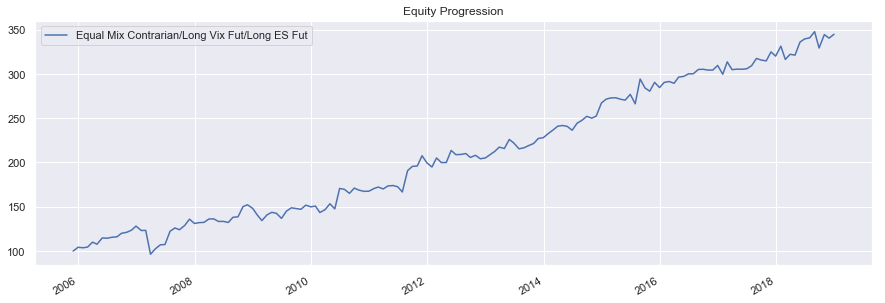

In [561]:
res.plot()

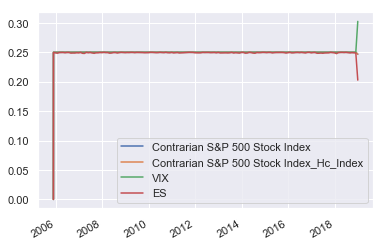

In [562]:
res.get_security_weights().plot()

,Contrarian S&P 500 Stock Index,Contrarian S&P 500 Stock Index_Hc_Index,VIX,ES
Contrarian S&P 500 Stock Index,1.00,0.87,0.07,-0.02
Contrarian S&P 500 Stock Index_Hc_Index,0.87,1.00,0.09,0.01
VIX,0.07,0.09,1.00,-0.43
ES,-0.02,0.01,-0.43,1.00


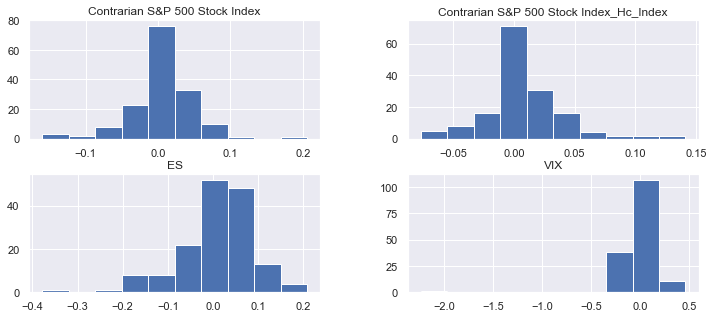

In [563]:
returns = data.to_log_returns().dropna()
ax = returns.hist(figsize=(12, 5))
returns.corr().as_format('.2f')

<module 'matplotlib.pyplot' from 'c:\\programdata\\anaconda3\\envs\\tensorflow_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

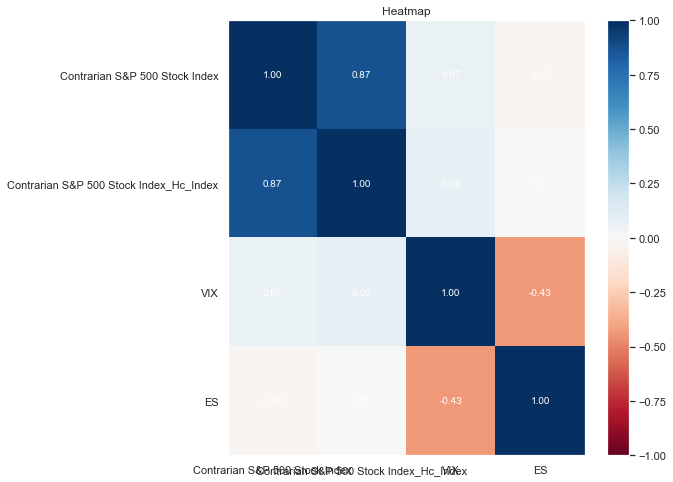

In [564]:
returns.plot_corr_heatmap(figsize=(8,8),)

In [565]:
res3 = bt.run(prog_1_Hc_Index_t, prog_1_t, test)
res3.display()

Stat                 Contrarian S&P 500 Stock Index_Hc_Index    Contrarian S&P 500 Stock Index    Equal Mix Contrarian/Long Vix Fut/Long ES Fut
-------------------  -----------------------------------------  --------------------------------  -----------------------------------------------
Start                2005-11-30                                 2005-11-30                        2005-11-30
End                  2018-12-31                                 2018-12-31                        2018-12-31
Risk-free rate       0.00%                                      0.00%                             0.00%

Total Return         258.54%                                    172.17%                           244.74%
Daily Sharpe         4.05                                       2.63                              3.59
Daily Sortino        9.27                                       4.53                              6.48
CAGR                 10.25%                                     7.95%      

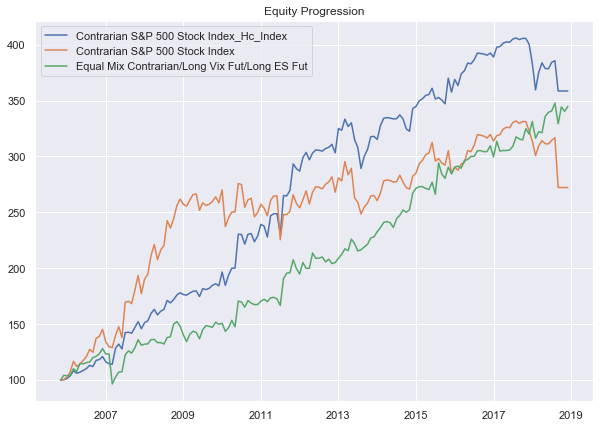

In [566]:
res3.plot(figsize=(10, 7),)

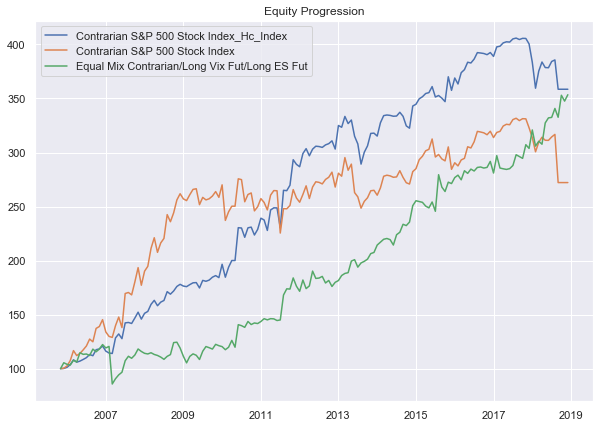

In [557]:
res3.plot(figsize=(10, 7),)

In [242]:
# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                    [prog_1_res.prices, prog_1_Hc_Index_res.prices])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other is a Strategy.
master = bt.Strategy('master', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                    [mom_s, vix])

# create the backtest and run it
t = bt.Backtest(master, data)
r = bt.run(t)
r.plot()

AttributeError: 'DataFrame' object has no attribute 'name'

In [146]:
prog_1_BH

<Strategy prog_1>

In [97]:
## download some data & calc SMAs
data = bt.get('spy', start='2010-01-01')
sma50 = data.rolling(5).mean()
sma200 = data.rolling(200).mean()

## now we need to calculate our target weight DataFrame
# first we will copy the sma200 DataFrame since our weights will have the same strucutre
tw = sma200.copy()
# set appropriate target weights
tw[sma50 > sma200] = 2.0
tw[sma50 <= sma200] = 0.50
# here we will set the weight to 0 - this is because the sma200 needs 200 data points before
# calculating its first point. Therefore, it will start with a bunch of nulls (NaNs).
tw[sma200.isnull()] = 0.0

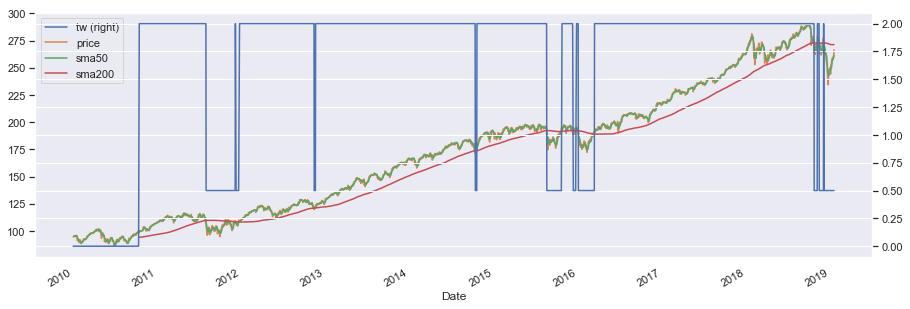

In [98]:
# plot the target weights + chart of price & SMAs
tmp = bt.merge(tw, data, sma50, sma200)
tmp.columns = ['tw', 'price', 'sma50', 'sma200']
ax = tmp.plot(figsize=(15,5), secondary_y=['tw'])

In [100]:
ma_cross = bt.Strategy('ma_cross', [bt.algos.WeighTarget(tw),
                                    bt.algos.Rebalance()])

t = bt.Backtest(ma_cross, data)
res = bt.run(t)
res.plot()

ma_cross
0% [############################# ] 100% | ETA: 00:00:00

In [103]:
type(data)
data

,spy
Date,
2010-01-04,94.545494
2010-01-05,94.795784
2010-01-06,94.862526
2010-01-07,95.262955
2010-01-08,95.579971
2010-01-11,95.713455
2010-01-12,94.820801
2010-01-13,95.621696
2010-01-14,95.880295


In [ ]:
# How to rename pandas Columns

In [ ]:
import numpy as np
import pandas as pd

from sklearn import mixture as mix

import matplotlib.pyplot as plt 
import jhtalib as jhta
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

import scipy
import statsmodels.api as sm


import bt
import ffn
import datetime 


#AlphaVantage Key insert quandl and tiingo also
key = 'AVC65FM7A32OFUBP'

from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries


ti = TechIndicators(key=key, output_format='pandas')
ts = TimeSeries(key=key, output_format='pandas', indexing_type='date')


# Call adjusted closes with ffn

In [ ]:
# Dates
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2019, 1, 27)

# Get data
product_name ='fxe'
# call adjusted closes with ffn
# prices = ffn.get(product_name, start=start, end=end )

# Call full OHLC V and Adjustments with AlphaVantage

In [ ]:

# call full OHLC V and Adjustments with AlphaVantage
# data_ti, meta_data_ti = ti.get_ht_trendline(product_name)
data_ts, meta_data_ts = ts.get_daily_adjusted(product_name,  outputsize='full')
# data_ts, meta_data_ts = ts.get_weekly_adjusted(product_name)
# data_ts, meta_data_ts = ts.get_intraday(product_name, interval='5min', outputsize='full')           

In [ ]:
data_ts = pd.DataFrame(data_ts,)
data_ts.index = pd.to_datetime(data_ts.index)


data_ts.head()
#insert graphic from Bokeh, Plotly and Altair
# with labeling and zooming where possible, hist wiht Kurnel outline.

# data_ts['5. adjusted close'].plot()

# Resample timeseries

In [ ]:
# data_ts['4. close'].resample('D').mean().plot(color='green', marker='*', figsize=(13,7))
x = data_ts['4. close']
x = np.asarray(x)
x = pd.DataFrame(x)
# x = pd.DataFrame()    #.to_csv('sine-wave.csv')
x.ndim

In [ ]:
data_ts.head()

In [ ]:
#rename the columns as desired

data_ts.columns =['Open', 'High', 'Low', 'Close', 'Adjusted Close',
                 'Volume', 'Dividend', 'Split Coeff']

# data_ts.columns =['Open', 'High', 'Low', 'Close', 'Adjusted Close',
#                  'Volume', 'Dividend']
data_ts.head()

In [ ]:
df = data_ts[['Open', 'High', 'Low', 'Adjusted Close']]
df.head()

In [ ]:
df = data_ts[['Open', 'High', 'Low', 'Close']]
df.index = pd.to_datetime(df.index)
df.head()

# Import Data with Pandas Datareader w fix.

In [ ]:
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override()
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

In [ ]:
WEED = pdr.get_data_yahoo('gld',start= start)

In [ ]:
WEED['Adj Close']['2014':].plot(figsize=(15,9), title='Canopy Growth Corporation', fontsize=25)

# Objectives


######  1 ) Create an unsupervised ML ( machine learning) algorithm to predict the regimes.
###### 2) Plot these regimes to visualize them.
######  3)Train a Support Vector Classifier algorithm with the regime as one of the features.
######  4)Use this Support Vector Classifier algorithm to predict the current day’s trend at the Opening of the market.
######  5)Visualize the performance of this strategy on the test data.


In [ ]:
#split data into train, test and validate

n = 7 # look back days for indicators
t = 0.2
split = int(t*len(df))

split

In [ ]:
# Begin the feature engineering by shifting the values so informantion
# available today can be used to infer tomorrow values.

speed = 8.0

df['High feature'] = df['High'].shift(1)
df['Low feature'] = df['Low'].shift(1)
df['Close feature'] = df['Close'].shift(1)
df['RSI'] = pd.DataFrame(jhta.RSI(df, n=n, price='Close'),index=df.index)
df['SMA'] = df['Close'].rolling(window=n).mean()
df['Corr'] = df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR'] = pd.DataFrame(jhta.SAR(df,af_step=0.1, af_max=0.015),index=df.index)
df['SAR2'] = pd.DataFrame(jhta.SAR(df,af_step=0.1*speed, af_max=0.015*speed),index=df.index)

df['ATR'] = pd.DataFrame(jhta.ATR(df,n=n),index=df.index)
df['Return'] = np.log(df['Open']/df['Open'].shift(1))
# df['Return'] = np.log(df['Close']/df['Close'].shift(1))
df['Monthly MA'] = df['Close'].resample('BM').mean().rolling(6).mean()
df['Monthly MA'] = df['Monthly MA'].fillna(method='ffill')

# df.pop('Weekly MA')

df = df.dropna()


# df['Close'].asfreq('D', method='ffill').tail()
# df['Close'].asfreq('w', method='ffill').tail()
# df['Close'].asfreq('BM', method='ffill').tail()

In [ ]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure 
from bokeh.models import DatetimeTickFormatter
from bokeh.plotting import figure

output_notebook()

# Create a blank figure with labels
p = figure(plot_width = 900, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'date', y_axis_label = 'Price in $s', 
           x_axis_location='above',y_axis_location='right',# set axis location heres
           x_axis_type='datetime',
          background_fill_color='black', #set background color and 
          border_fill_color='orange',) 

# p.xaxis.formatter=DatetimeTickFormatter(
# #         hours=["%d %B %Y"],
# #         days=["%d %B %Y"],
#         months=["%d %B %Y"],
# #         years=["%d %B %Y"],
#     )
p.xaxis.major_label_orientation = 2/4


p.line(df.index, df['Close'].loc['2016':'2018'],line_color='orange', line_width=2,)
p.line(df.index, df['SAR'].loc['2016':'2018'],line_color='green', line_width=2,)
p.line(df.index, df['SAR2'].loc['2016':'2018'],line_color='blue', line_width=2,)
p.line(df.index, df['Monthly MA'].loc['2016':'2018'],line_color='cyan', line_width=2,)
# p.line(df.index, df['SAR3'].loc['2018'],line_color='blue', line_width=2,)
show(p)

In [ ]:
ss = StandardScaler()

# unsup = mix.BayesianGaussianMixture(n_components=5, covariance_type='full', 
#                                     tol=0.001, reg_covar=1e-06, max_iter=100, 
#                                     n_init=1, init_params='kmeans', 
#                                     weight_concentration_prior_type='dirichlet_process', 
#                                     weight_concentration_prior=None, 
#                                     mean_precision_prior=None, 
#                                     mean_prior=None, degrees_of_freedom_prior=None, 
#                                     covariance_prior=None, random_state=None, 
#                                     warm_start=False, verbose=0, verbose_interval=10)



unsup = mix.GaussianMixture(n_components=6, covariance_type='spherical', 
                            n_init=100, init_params='kmeans',
                            random_state=42,)

# df = df.drop(['High', 'Low', 'Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime = unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))


In [ ]:
regime

In [ ]:
Regimes = pd.DataFrame(regime, columns=['Regime'], index=df[split:].index)\
.join(df[split:], how='inner')\
     .assign(market_cu_return=df[split:]\
             .Return.cumsum())\
             .reset_index(drop=False)\
             .rename(columns={'index':'Date'})

In [ ]:
Regimes

In [ ]:
order = [0,1,2,3,4,5]
fig = sns.FacetGrid(data=Regimes,hue='Regime', hue_order=order, aspect =1,size=8)
fig.map(plt.scatter, 'date', 'market_cu_return', s=5).add_legend()

# for i in order:
#     print('Mean for regime %i:'%i, unsup.means_[i][0])
#     print('Co-Variance for regime %i: '%i,(unsup.covariances_[i]))

In [ ]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime', 'date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal']= 1.00
Regimes.loc[Regimes['Return']<0, 'Signal']=0.0

In [ ]:
cls = SVC(C=3.0, cache_size=100, class_weight=None, coef0=2.0,
          decision_function_shape=None, degree=4, 
          gamma='auto', kernel='rbf', max_iter=-1, probability=False,
          random_state=None, shrinking=True, 
          tol=0.001, verbose=False,  )

In [ ]:
split2 = int(0.85*len(Regimes)) # alter the training period

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'date'], axis=1)
y = Regimes['Signal']

cls.fit(X[:split2], y[:split2])

In [ ]:
p_data = len(X)-split2

df['Pred_Signal']=0
df.iloc[-p_data: ,df.columns.get_loc('Pred_Signal')]=cls.predict(X[split2:])

# print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

In [ ]:
df.iloc[-p_data: ,df.columns.get_loc('Pred_Signal')]['2018'].tail(150).plot()

In [ ]:
df['strategy_cu_return'] = 0.
df['market_cu_return'] = 0.

df.iloc[-p_data:, df.columns.get_loc('strategy_cu_return')]\
    =np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')]\
    =np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])\
    /np.nanstd(df['strategy_cu_return'][-p_data:])


plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns', )
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.14, .9, s='Sharpe ratio: % .2f'%Sharpe)
# plt.Axes(xscale=)
plt.legend(loc= 'best')


plt.show()

In [ ]:
df['strategy_cu_return'] = 0.
df['market_cu_return'] = 0.

df.iloc[-p_data:, df.columns.get_loc('strategy_cu_return')]\
    =np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')]\
    =np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])\
    /np.nanstd(df['strategy_cu_return'][-p_data:])


plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns', )
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.14, .9, s='Sharpe ratio: % .2f'%Sharpe)
# plt.Axes(xscale=)
plt.legend(loc= 'best')


plt.show()


In [ ]:
df[['SAR','Close','Monthly MA',]]['2017':'2018'].plot(figsize=(10,7))

plt.show()

In [ ]:
# pd.DataFrame(jhta.APO(df, n_fast=5, n_slow=50, price='Close'),index=df.index)
# df
# pd.DataFrame(jhta.MOM(df, 7),index=df.index)['2018'].plot()

# pd.DataFrame(jhta.ATR(df,n=n),index=df.index)['2018'].plot()

# pd.DataFrame(jhta.TS(df,n=n),index=df.index)['2015':'2018'].plot()

# df1 = df['Close'].asfreq(freq='BM', method='ffill') #.ewn(10).mean()
df2 = df['Close'].resample('BM')        #asfreq(freq='BM', method='ffill') #.ewn(10).mean()
# df1 = df1.rolling(10).mean()

# df2.plot()


In [ ]:
# df['Close'].resample('BM').mean().plot()
# df['Close'].resample('W').mean().rolling(43).mean()
# df['Close'].resample('W').mean()
df['Close'].asfreq('D', method='ffill').tail()
df['Close'].asfreq('w', method='ffill').tail()
df['Close'].asfreq('BM', method='ffill').tail()

In [ ]:
import jhtalib as jhta
jhta.CCI()

In [ ]:
tw = signal
tw = pd.DataFrame(tw).dropna()
data = prices.iloc[:,0]
data = pd.DataFrame(data).dropna()
tw[tw.isnull()] = 0.0
tw.head()

In [ ]:
data = bt.get('spy', start='2010-01-01')
sma50 = data.rolling(50).mean()
sma200 = data.rolling(200).mean()

## now we need to calculate our target weight DataFrame
# first we will copy the sma200 DataFrame since our weights will have the same strucutre
tw = sma200.copy()
# set appropriate target weights
tw[sma50 > sma200] = 1.0
tw[sma50 <= sma200] = -1.0
# here we will set the weight to 0 - this is because the sma200 needs 200 data points before
# calculating its first point. Therefore, it will start with a bunch of nulls (NaNs).
tw[sma200.isnull()] = 0.0

In [ ]:
tw.info()